In [72]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read data into pandas dataframe
kick_data = pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter002.csv")
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter003.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter004.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter005.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter006.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter007.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter008.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter009.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter010.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter011.csv"))
kick_data = kick_data.append(pd.read_csv("/Users/Nicole/Documents/Kickstarter/Kickstarter012.csv"))

# Isolate relevant attributes
kick_data = kick_data.loc[:, ['backers_count','blurb','category','country', 'goal', 
                              'staff_pick', 'state', 'usd_pledged']]
# initial count will return 41664 for most categories, 41662 for blurb column
kick_data.count()

kick_data.head()

,backers_count,blurb,category,country,goal,staff_pick,state,usd_pledged
0,32,Drinking Card Games are normal playing cards w...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",US,1600.0,False,failed,563.00000
1,6509,Aliens! Mutants! Weird science! Gather your He...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",US,100000.0,True,successful,911937.00000
2,0,A virtual application that allows you to be at...,"{""id"":332,""name"":""Apps"",""slug"":""technology/app...",US,50000.0,False,failed,0.00000
3,19,We're dusting off the vintage radio and giving...,"{""id"":339,""name"":""Sound"",""slug"":""technology/so...",AU,2000.0,False,successful,3223.97705
4,4,I'm a young mechanic that is fixing cars for l...,"{""id"":25,""name"":""Sculpture"",""slug"":""art/sculpt...",US,1000.0,False,failed,161.00000


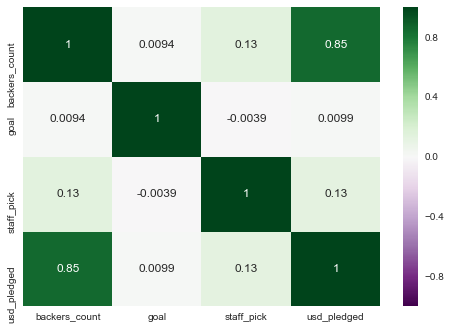

In [104]:
# using new cell allows dataframe from previous cell to remain intact
# values in state column changed to integers for correlation analysis
kick_data.loc[kick_data["state"] == "successful", 'state'] = 1
kick_data.loc[kick_data["state"] == "failed", 'state'] = 0
kick_data.loc[kick_data["state"] == "canceled", 'state'] = 0
kick_data.loc[kick_data["state"] == "suspended", 'state'] = 0
# remove live entries as their final state is unknown
kick_data = kick_data[kick_data.state != 'live']
# remove rows with missing values
kick_data = kick_data.dropna()

kick_data.count()

In [75]:
# Count entries per value in category column
kick_data['category'].value_counts()
# Return entries per value in category column with a count of less than a certain number
kick_data['category'].value_counts()[kick_data['category'].value_counts()<1]
# Count how many unique values in category column
kick_data['category'].nunique()

169

In [86]:
# Count entries per value in country column
kick_data['country'].value_counts()

US    28599
GB     4396
CA     1938
AU      915
DE      613
FR      540
MX      442
IT      433
ES      375
NL      365
SE      254
DK      208
HK      185
NZ      172
SG      147
IE      118
BE      116
CH      113
AT       84
NO       79
JP       68
LU        7
Name: country, dtype: int64

In [77]:
# Count entries per value in staff_pick column
kick_data['staff_pick'].value_counts()

False    34899
True      5268
Name: staff_pick, dtype: int64

In [78]:
# Count entries per value in state column
kick_data['state'].value_counts()

1    23387
0    16780
Name: state, dtype: int64

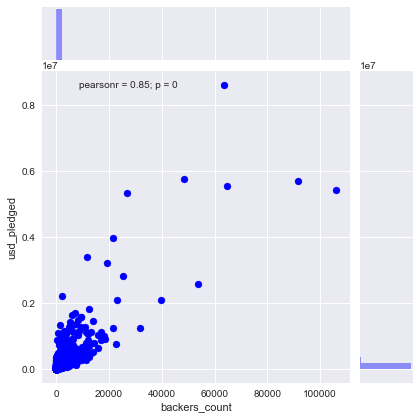

In [79]:
# Construct seaborn jointplot
sns.jointplot(data=kick_data, x='backers_count', y='usd_pledged', color='b')
# Show plot
plt.show()

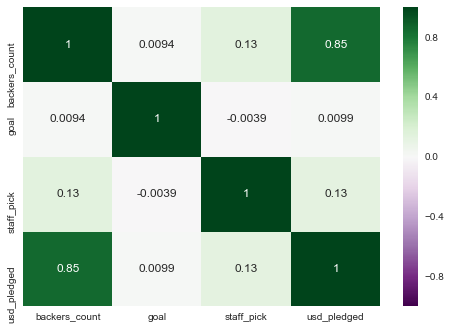

In [105]:
# Construct seaborn heatmap to get correlations between attributes
sns.heatmap(kick_data.corr(), annot=True, cmap='PRGn')
# Show plot
plt.show()

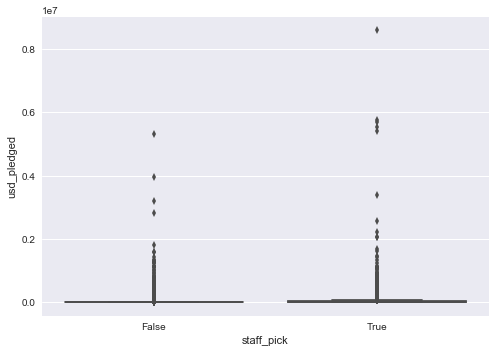

In [81]:
# Construct seaborn boxplot to see how being a staff pick affects how much is pledged
sns.boxplot(x="staff_pick", y="usd_pledged", data=kick_data)
# Show plot
plt.show()

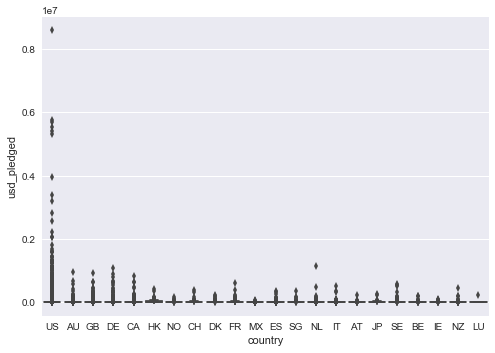

In [82]:
# Construct seaborn boxplot to see how country affects how much is pledged
sns.boxplot(x="country", y="usd_pledged", data=kick_data)
# Show plot
plt.show()

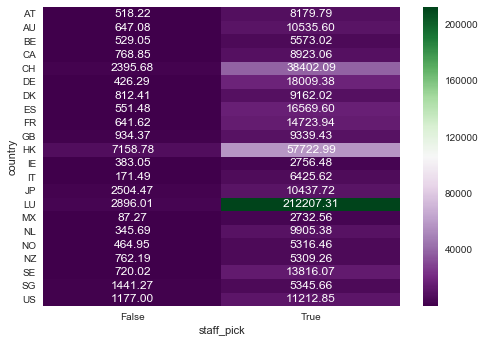

In [83]:
# Construct heatmap to show median value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', values='usd_pledged', aggfunc=np.median)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
# Show plot
plt.show()

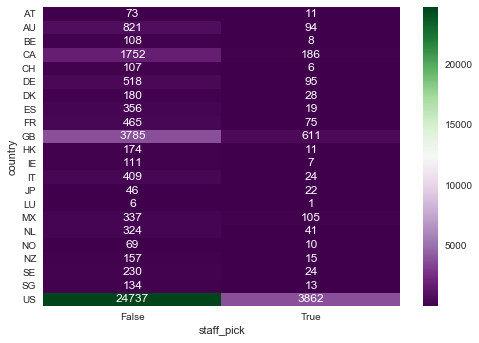

In [84]:
# Count entries per country based on staff_pick
kick_pt = kick_data.pivot_table(index='country', columns='staff_pick', aggfunc='size')
sns.heatmap(kick_pt, annot=True, fmt=".0f", cmap = "PRGn")
# Show plot
plt.show()

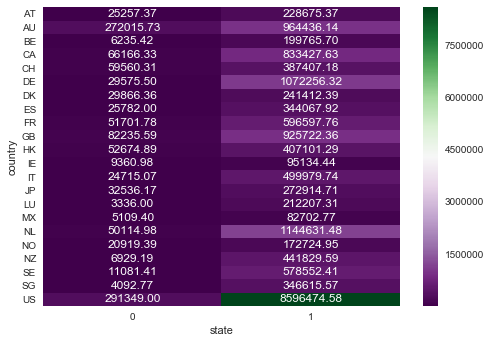

In [85]:
# Construct heatmap to show maximum value of usd_pledged based on country and staff pick
kick_pt = kick_data.pivot_table(index='country', columns='state', values='usd_pledged', aggfunc=np.max)
sns.heatmap(kick_pt, annot=True, fmt=".2f", cmap = "PRGn")
# Show plot
plt.show()